In [1]:
# importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# reading file 
interest_Rates = pd.read_excel("Interest_Rates.xlsx")
cash = pd.read_excel("Cash Purchase.xlsx")
mortgage = pd.read_excel("Mortgage.xlsx")
unemployment_Rate = pd.read_excel("Unemployment_Rate.xlsx")

In [5]:
interest_Rates.head()

,observation_date,Interest Rates
0,1988-01-01,6.197500
1,1989-01-01,6.924167
2,1990-01-01,6.982500
3,1991-01-01,5.447500
4,1992-01-01,3.251667


In [6]:
cash.head()

,observation_date,Cash Purchase
0,1988-01-01,15.50
1,1989-01-01,14.50
2,1990-01-01,12.50
3,1991-01-01,10.75
4,1992-01-01,10.25


In [7]:
mortgage.head()

,observation_date,Mortgage
0,1988-01-01,10.341731
1,1989-01-01,10.319423
2,1990-01-01,10.129423
3,1991-01-01,9.246538
4,1992-01-01,8.390189


In [8]:
unemployment_Rate.head()

,observation_date,Unemployment Rate
0,1988-01-01,5.491667
1,1989-01-01,5.258333
2,1990-01-01,5.616667
3,1991-01-01,6.850000
4,1992-01-01,7.491667


In [115]:
#droping all the abservation dates for concatinate data. ( in observation just cash is visible but other code is deleted where i 
# droped obervation columns of unemployment_Rate and other)
cash.drop("observation_date", axis = "columns", inplace= True)
cash.head()

KeyError: "['observation_date'] not found in axis"

In [35]:

unemployment_Rate.head()

,Unemployment Rate
0,5.491667
1,5.258333
2,5.616667
3,6.850000
4,7.491667


In [36]:
# concatinating all columns
df = pd.concat([interest_Rates, cash, mortgage, unemployment_Rate], axis = 1)
df.head()

,observation_date,Interest Rates,Cash Purchase,Mortgage,Unemployment Rate
0,1988-01-01,6.197500,15.50,10.341731,5.491667
1,1989-01-01,6.924167,14.50,10.319423,5.258333
2,1990-01-01,6.982500,12.50,10.129423,5.616667
3,1991-01-01,5.447500,10.75,9.246538,6.850000
4,1992-01-01,3.251667,10.25,8.390189,7.491667


In [75]:
df.describe()

,Interest Rates,Cash Purchase,Mortgage,Unemployment Rate
count,33.000000,34.000000,34.000000,34.000000
mean,3.231641,9.397059,6.227490,5.866176
std,2.130965,2.598162,2.138454,1.553161
min,0.500000,4.250000,2.957692,3.675000
25%,1.020833,8.000000,4.238622,4.775000
50%,3.000000,9.625000,6.182239,5.516667
75%,5.020000,10.625000,7.754327,6.677083
max,6.982500,15.500000,10.341731,9.608333


In [77]:
# seeing any null values are there are not
df.isna().sum()

observation_date     1
Interest Rates       1
Cash Purchase        0
Mortgage             0
Unemployment Rate    0
dtype: int64

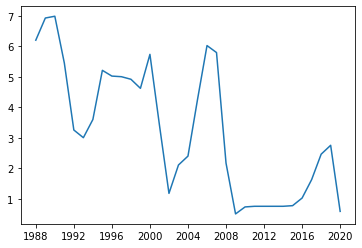

In [40]:
plt.plot(df["observation_date"],df[["Interest Rates"]])

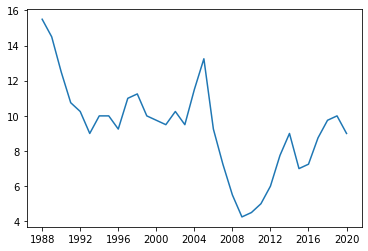

In [41]:
plt.plot(df["observation_date"],df[["Cash Purchase"]])

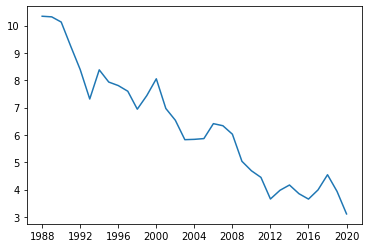

In [42]:
plt.plot(df["observation_date"],df[["Mortgage"]])

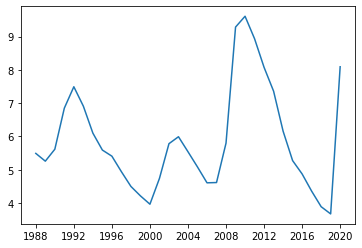

In [43]:
plt.plot(df["observation_date"],df[["Unemployment Rate"]])

In [44]:
# this will be my target 
home_price_index = pd.read_excel("US_Home_Price_index.xlsx")
home_price_index.head()

,observation_date,National Home Price Index
0,1988-01-01,71.141917
1,1989-01-01,75.508917
2,1990-01-01,76.939833
3,1991-01-01,75.926333
4,1992-01-01,76.329750


In [45]:
home_price_index.drop(["observation_date"], axis = "columns", inplace= True)
home_price_index

,National Home Price Index
0,71.141917
1,75.508917
2,76.939833
3,75.926333
4,76.329750
5,77.415250
6,79.470083
7,80.992500
8,82.809833
9,85.318417


In [94]:
df.isna().sum()

observation_date     1
Interest Rates       1
Cash Purchase        0
Mortgage             0
Unemployment Rate    0
dtype: int64

In [97]:
newdf = df.interpolate(method="ffill")
newdf.head()

,observation_date,Interest Rates,Cash Purchase,Mortgage,Unemployment Rate
0,1988-01-01,6.197500,15.50,10.341731,5.491667
1,1989-01-01,6.924167,14.50,10.319423,5.258333
2,1990-01-01,6.982500,12.50,10.129423,5.616667
3,1991-01-01,5.447500,10.75,9.246538,6.850000
4,1992-01-01,3.251667,10.25,8.390189,7.491667


In [98]:
newdf.isna().sum()

observation_date     0
Interest Rates       0
Cash Purchase        0
Mortgage             0
Unemployment Rate    0
dtype: int64

In [99]:
df1 = pd.concat([newdf,home_price_index], axis = 1)
df1.head()

,observation_date,Interest Rates,Cash Purchase,Mortgage,Unemployment Rate,National Home Price Index
0,1988-01-01,6.197500,15.50,10.341731,5.491667,71.141917
1,1989-01-01,6.924167,14.50,10.319423,5.258333,75.508917
2,1990-01-01,6.982500,12.50,10.129423,5.616667,76.939833
3,1991-01-01,5.447500,10.75,9.246538,6.850000,75.926333
4,1992-01-01,3.251667,10.25,8.390189,7.491667,76.329750


In [100]:
X = df1.drop(["observation_date", "National Home Price Index"], axis ="columns")

In [101]:
X.head()

,Interest Rates,Cash Purchase,Mortgage,Unemployment Rate
0,6.197500,15.50,10.341731,5.491667
1,6.924167,14.50,10.319423,5.258333
2,6.982500,12.50,10.129423,5.616667
3,5.447500,10.75,9.246538,6.850000
4,3.251667,10.25,8.390189,7.491667


In [102]:
y = df1["National Home Price Index"]
y.head()

0    71.141917
1    75.508917
2    76.939833
3    75.926333
4    76.329750
Name: National Home Price Index, dtype: float64

In [103]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2)

In [105]:
X_train.shape

(27, 4)

In [106]:
X_test.shape

(7, 4)

In [107]:
model.fit(X_train, y_train)

LinearRegression()

In [109]:
model.score(X_test, y_test)

0.8059633756138967

In [110]:
y_predicted = model.predict(X_test)

In [112]:
from sklearn.metrics import confusion_matrix